### Using the past data of  banks/organizations built a Machine learning model which verify the percentage of being fraudster on the new customer on the basis of customer past transections and behaviour 

### What I have did.....

 #### Data Visualization
 #### Imputation of Data
 #### figured out unnecessory columns and multicollinearity columns
 #### Scaling of Data
 #### Model building [ Decision tree classifier , Logistic Regression ]
 #### Model building using Pipeline


## accuracy of Model - 76%

In [2]:
import pandas as pd 
import numpy as np


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [3]:
chek_df = pd.read_csv('insurance_claims.csv')


In [4]:
df = pd.read_csv('insurance_claims.csv')

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
df['final_verification'] = df.fraud_reported.apply(lambda x:1 if x == 'Y' else 0)

In [7]:
df.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,final_verification
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,1


### if fraud detected then Value is 1 else 0

In [8]:
len(df.columns)

41

In [9]:
a=list(df.columns)

In [10]:
b = ['policy_number','months_as_customer',
 'age',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39',
 'final_verification']

In [12]:
import pandas as pd

In [13]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,final_verification
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,1
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,NaN,0


In [14]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [15]:
df.final_verification.value_counts()

0    753
1    247
Name: final_verification, dtype: int64

In [16]:
df.shape

(1000, 41)

In [26]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [18]:
df.age.value_counts().head(5)

43    49
39    48
41    45
34    44
38    42
Name: age, dtype: int64

In [19]:
df.dtypes
    

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [20]:
df.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,final_verification
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,1


In [22]:
df.replace('?',np.nan, inplace= True)

In [23]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# # Data Preprocessing


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [33]:
df.isna().mean().sort_values(ascending=False)*100

_c39                           100.0
property_damage                 36.0
police_report_available         34.3
collision_type                  17.8
months_as_customer               0.0
incident_city                    0.0
incident_location                0.0
incident_hour_of_the_day         0.0
number_of_vehicles_involved      0.0
bodily_injuries                  0.0
witnesses                        0.0
total_claim_amount               0.0
authorities_contacted            0.0
injury_claim                     0.0
property_claim                   0.0
vehicle_claim                    0.0
auto_make                        0.0
auto_model                       0.0
auto_year                        0.0
fraud_reported                   0.0
incident_state                   0.0
incident_severity                0.0
age                              0.0
insured_zip                      0.0
policy_number                    0.0
policy_bind_date                 0.0
policy_state                     0.0
p

In [35]:
df.isna().sum().sort_values(ascending=False).head(5)

_c39                       1000
property_damage             360
police_report_available     343
collision_type              178
months_as_customer            0
dtype: int64

In [30]:
import matplotlib.pyplot as plt

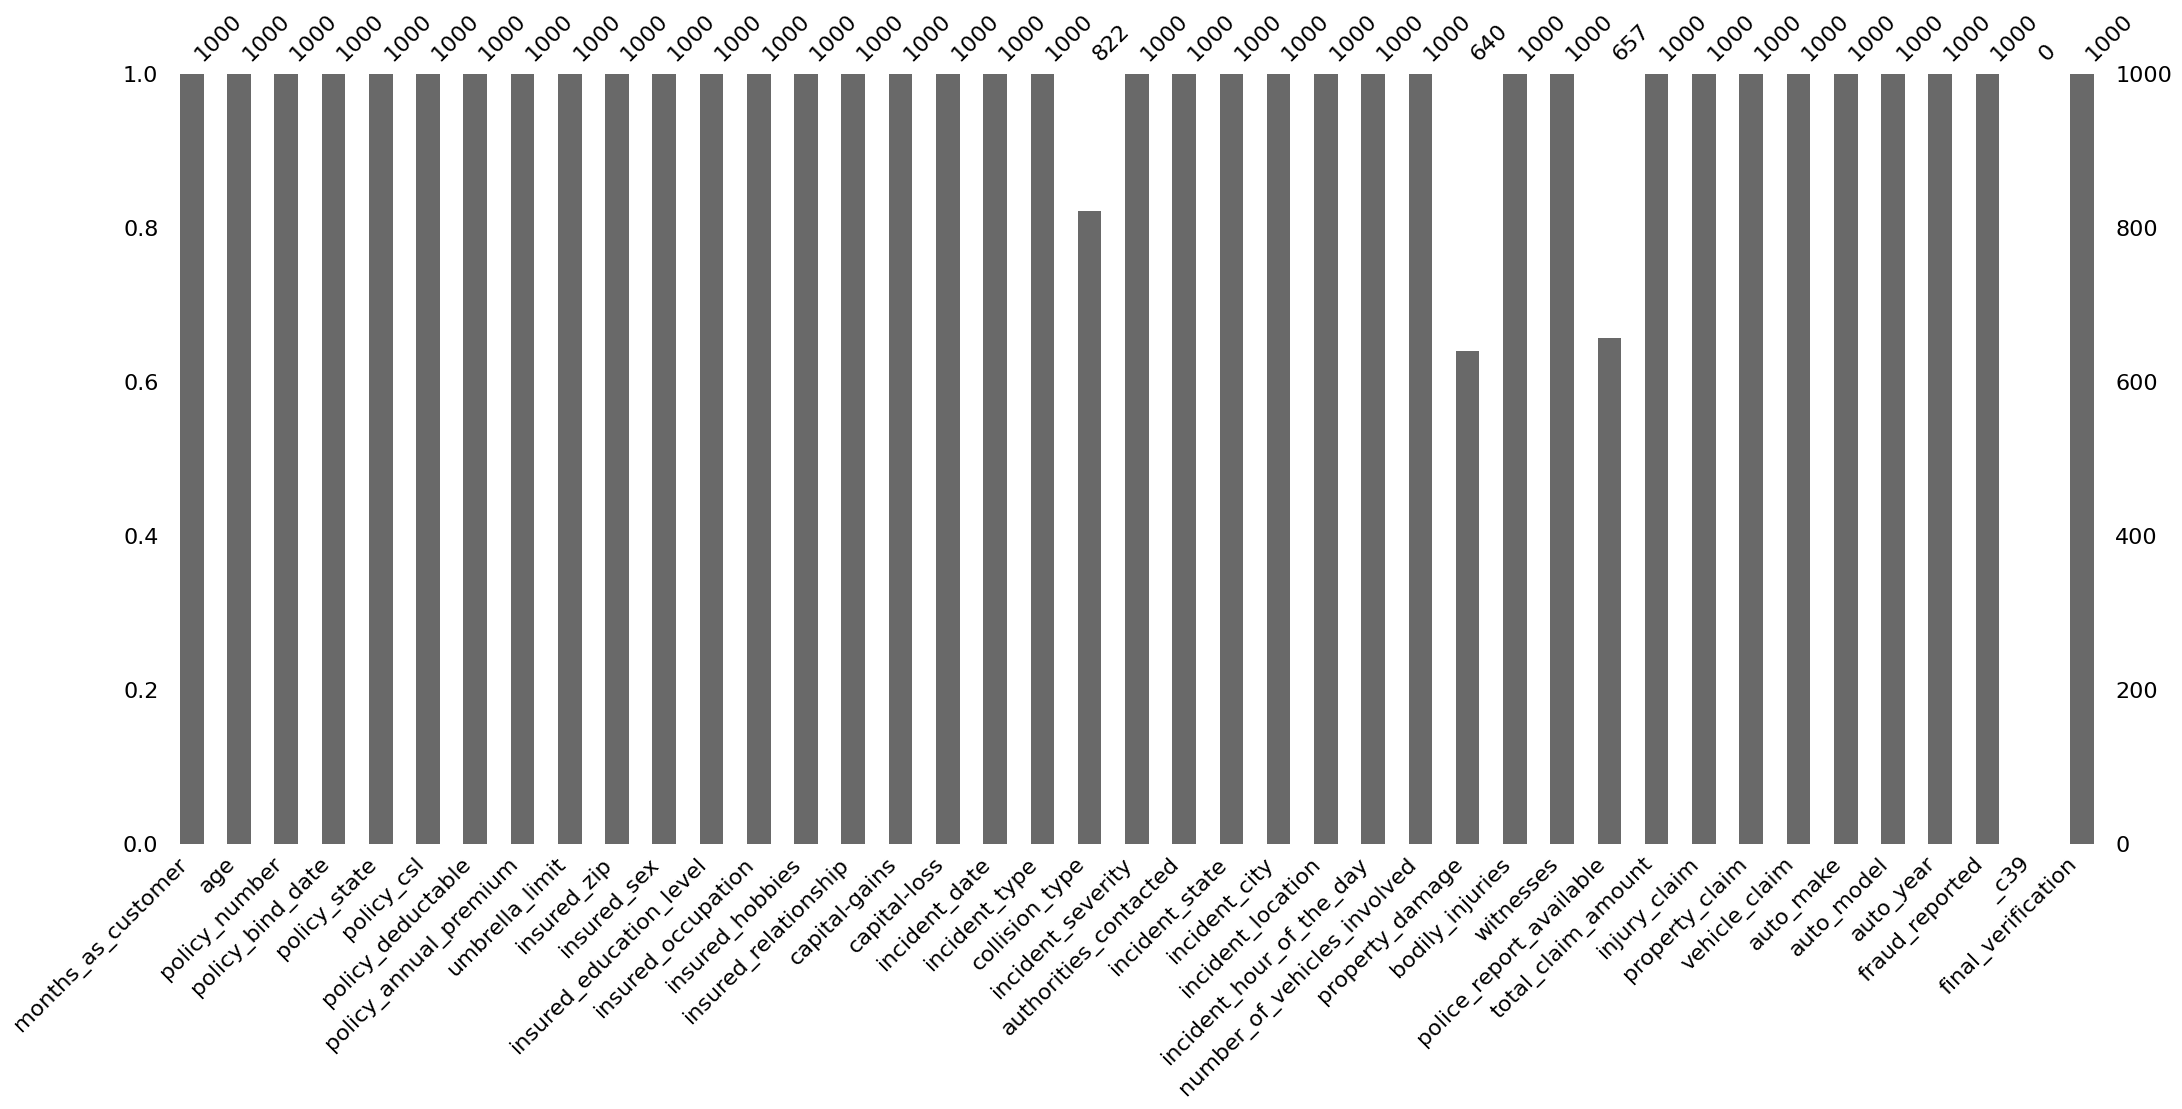

In [31]:
import missingno as msno

msno.bar(df)
plt.show()

### showing the bar chart of missing value of every column

- _c39 has all nun value.. so we can remove it.

### Data Imputation of missing value using statistical technique

In [32]:
df['collision_type'].mode()[0]

'Rear Collision'

In [33]:
df.collision_type.mode()

0    Rear Collision
Name: collision_type, dtype: object

In [34]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [35]:
# here mode is not perfect filling , but thats right for now  

In [36]:
df.isna().mean().sort_values(ascending=False).head(5)*100

_c39                       100.0
property_damage             36.0
police_report_available     34.3
collision_type              17.8
months_as_customer           0.0
dtype: float64

In [37]:
df.isna().sum().sort_values(ascending=False).head(5)

_c39                       1000
property_damage             360
police_report_available     343
collision_type              178
months_as_customer            0
dtype: int64

In [38]:
df.property_damage.mode()

0    NO
Name: property_damage, dtype: object

In [39]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [40]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [41]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [42]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [43]:
import seaborn as sns

In [44]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [45]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,final_verification
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,YES,1,2,YES,71610,6510,13020,52080,Y,1
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,NO,0,0,NO,5070,780,780,3510,Y,1
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,NO,2,3,NO,34650,7700,3850,23100,N,0
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,NO,1,2,NO,63400,6340,6340,50720,Y,1
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,NO,0,1,NO,6500,1300,650,4550,N,0


## It is time for find out Multicollinearity

C:\Users\DELL\AppData\Local\Temp\ipykernel_5344\2895059636.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True,fmt='0.2g',linewidths=1)


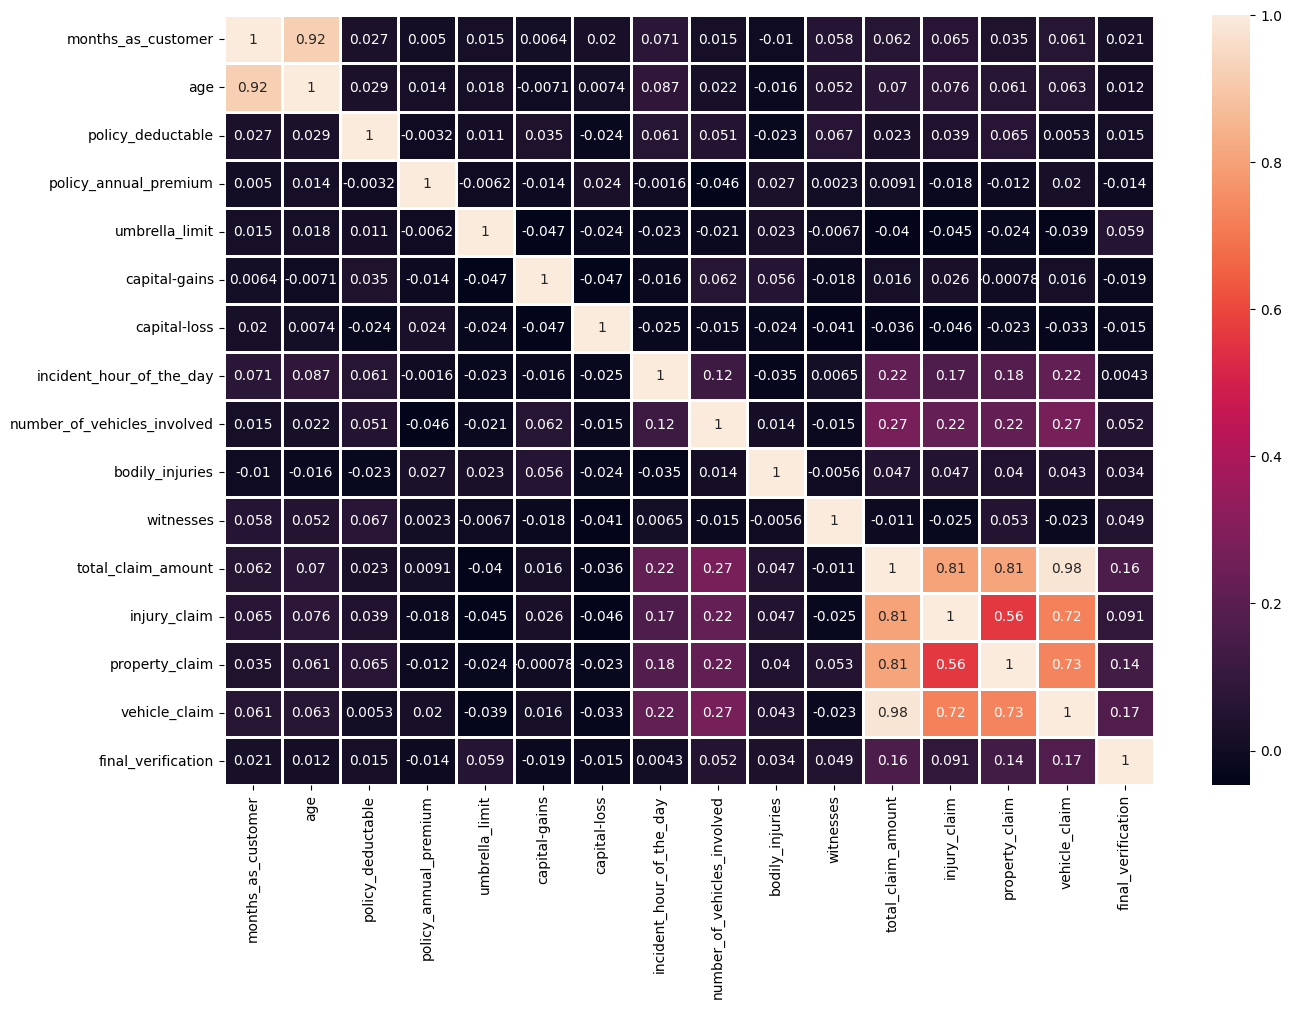

In [46]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot= True,fmt='0.2g',linewidths=1)
plt.show()

- Here 2 features are showing the multicollinearity.

In [48]:
df.drop(columns=['age','total_claim_amount'],axis= 1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5344\3108624741.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, linewidths=1)


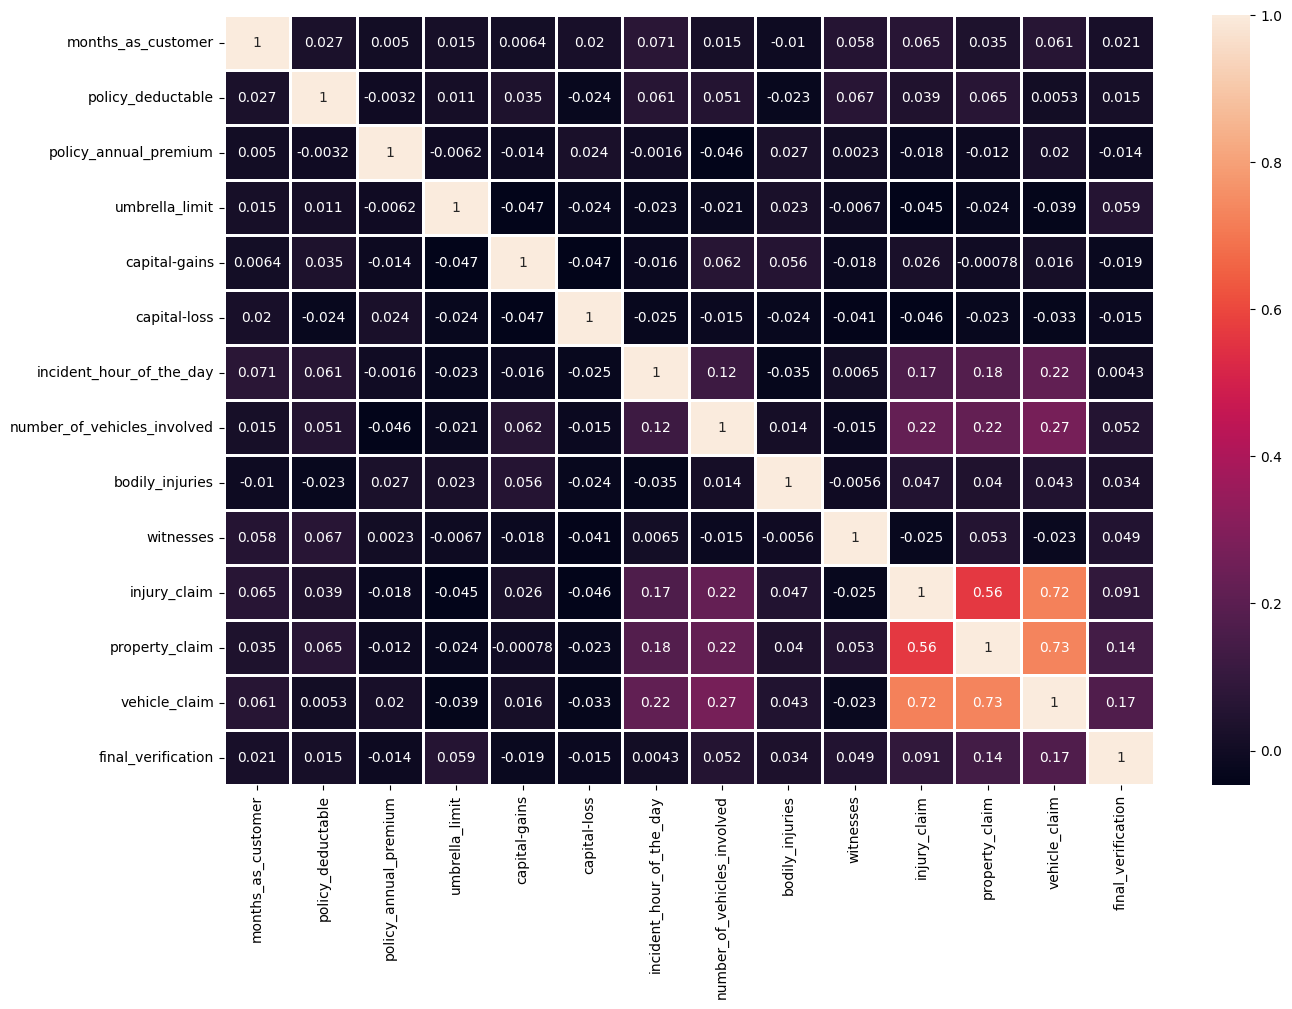

In [49]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot= True, linewidths=1)
plt.show()

In [50]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported,final_verification
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,1,YES,1,2,YES,6510,13020,52080,Y,1
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,1,NO,0,0,NO,780,780,3510,Y,1
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,3,NO,2,3,NO,7700,3850,23100,N,0
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,1,NO,1,2,NO,6340,6340,50720,Y,1
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,1,NO,0,1,NO,1300,650,4550,N,0


In [51]:
df.shape

(1000, 26)

In [52]:
df.columns

Index(['months_as_customer', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'final_verification'],
      dtype='object')

### Preparing of Dataset for train test split

In [53]:
X = df.drop(columns=['fraud_reported','final_verification'], axis = 1)
y = df['final_verification']

In [54]:
X.shape

(1000, 24)

In [55]:
X.shape

(1000, 24)

In [56]:
X.columns

Index(['months_as_customer', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [57]:
y.shape

(1000,)

## Encoding Categorical value

In [59]:
cat_df = X.select_dtypes(include=['object'])

In [60]:
cat_df.shape

(1000, 11)

In [61]:

cat_df

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
995,500/1000,FEMALE,Masters,craft-repair,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,YES,NO
996,100/300,FEMALE,PhD,prof-specialty,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,YES,NO
997,250/500,FEMALE,Masters,armed-forces,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NO,YES
998,500/1000,MALE,Associate,handlers-cleaners,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NO,YES


In [62]:
cat_df.insured_sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [63]:
cat_df.columns.nunique()

11

## Categorical value to Numerical Value

In [64]:
for col in cat_df.columns:
    print(f"{col} \n {cat_df[col].nunique()}\n ")
    
    
#     for col in cat_df.columns:
#     print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl 
 3
 
insured_sex 
 2
 
insured_education_level 
 7
 
insured_occupation 
 14
 
insured_relationship 
 6
 
incident_type 
 4
 
collision_type 
 3
 
incident_severity 
 4
 
authorities_contacted 
 5
 
property_damage 
 2
 
police_report_available 
 2
 


In [65]:
for col in cat_df.columns:
    print(f"{col} \n {cat_df[col].nunique()}\n ")

policy_csl 
 3
 
insured_sex 
 2
 
insured_education_level 
 7
 
insured_occupation 
 14
 
insured_relationship 
 6
 
incident_type 
 4
 
collision_type 
 3
 
incident_severity 
 4
 
authorities_contacted 
 5
 
property_damage 
 2
 
police_report_available 
 2
 


In [66]:
# 3,2,7,14,6,4,3,4,5,2,2 unique values

In [67]:
# We will use here pd.Dummiies


In [68]:
df.head(4)

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported,final_verification
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,1,YES,1,2,YES,6510,13020,52080,Y,1
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,1,NO,0,0,NO,780,780,3510,Y,1
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,3,NO,2,3,NO,7700,3850,23100,N,0
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,1,NO,1,2,NO,6340,6340,50720,Y,1


In [69]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO


In [70]:
cat_df = pd.get_dummies(cat_df,drop_first=True)

In [71]:
cat_df

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
997,1,0,0,0,0,0,0,1,0,1,...,1,1,0,0,0,0,0,1,0,1
998,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [72]:
cat_df.shape

(1000, 41)

In [73]:
cat_df.columns

Index(['policy_csl_250/500', 'policy_csl_500/1000', 'insured_sex_MALE',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_relationship_not-in-family',
       'insured_relationship_other-relative', 'insured_relationship_own-child',
       'insured_relationship

In [74]:
X.dtypes.value_counts()

int64      12
object     11
float64     1
dtype: int64

In [75]:
X.select_dtypes(include=['int64']).shape

(1000, 12)

In [76]:
num_df = X.select_dtypes(include=['int64'])

In [77]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [78]:
num_df.shape, cat_df.shape, X.shape

((1000, 12), (1000, 41), (1000, 24))

In [79]:
X.head(3)

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,Police,5,1,YES,1,2,YES,6510,13020,52080
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,Police,8,1,NO,0,0,NO,780,780,3510
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,Police,7,3,NO,2,3,NO,7700,3850,23100


### Concating the numerical and categorical columns

In [80]:
X = pd.concat([num_df,cat_df], axis=1)

In [81]:
X.shape,y.shape

((1000, 53), (1000,))


## Final X

In [82]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,1,0,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,0,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,1,0,0,0,1,0,0,0,0


### figuring out the distribution of data using histplot

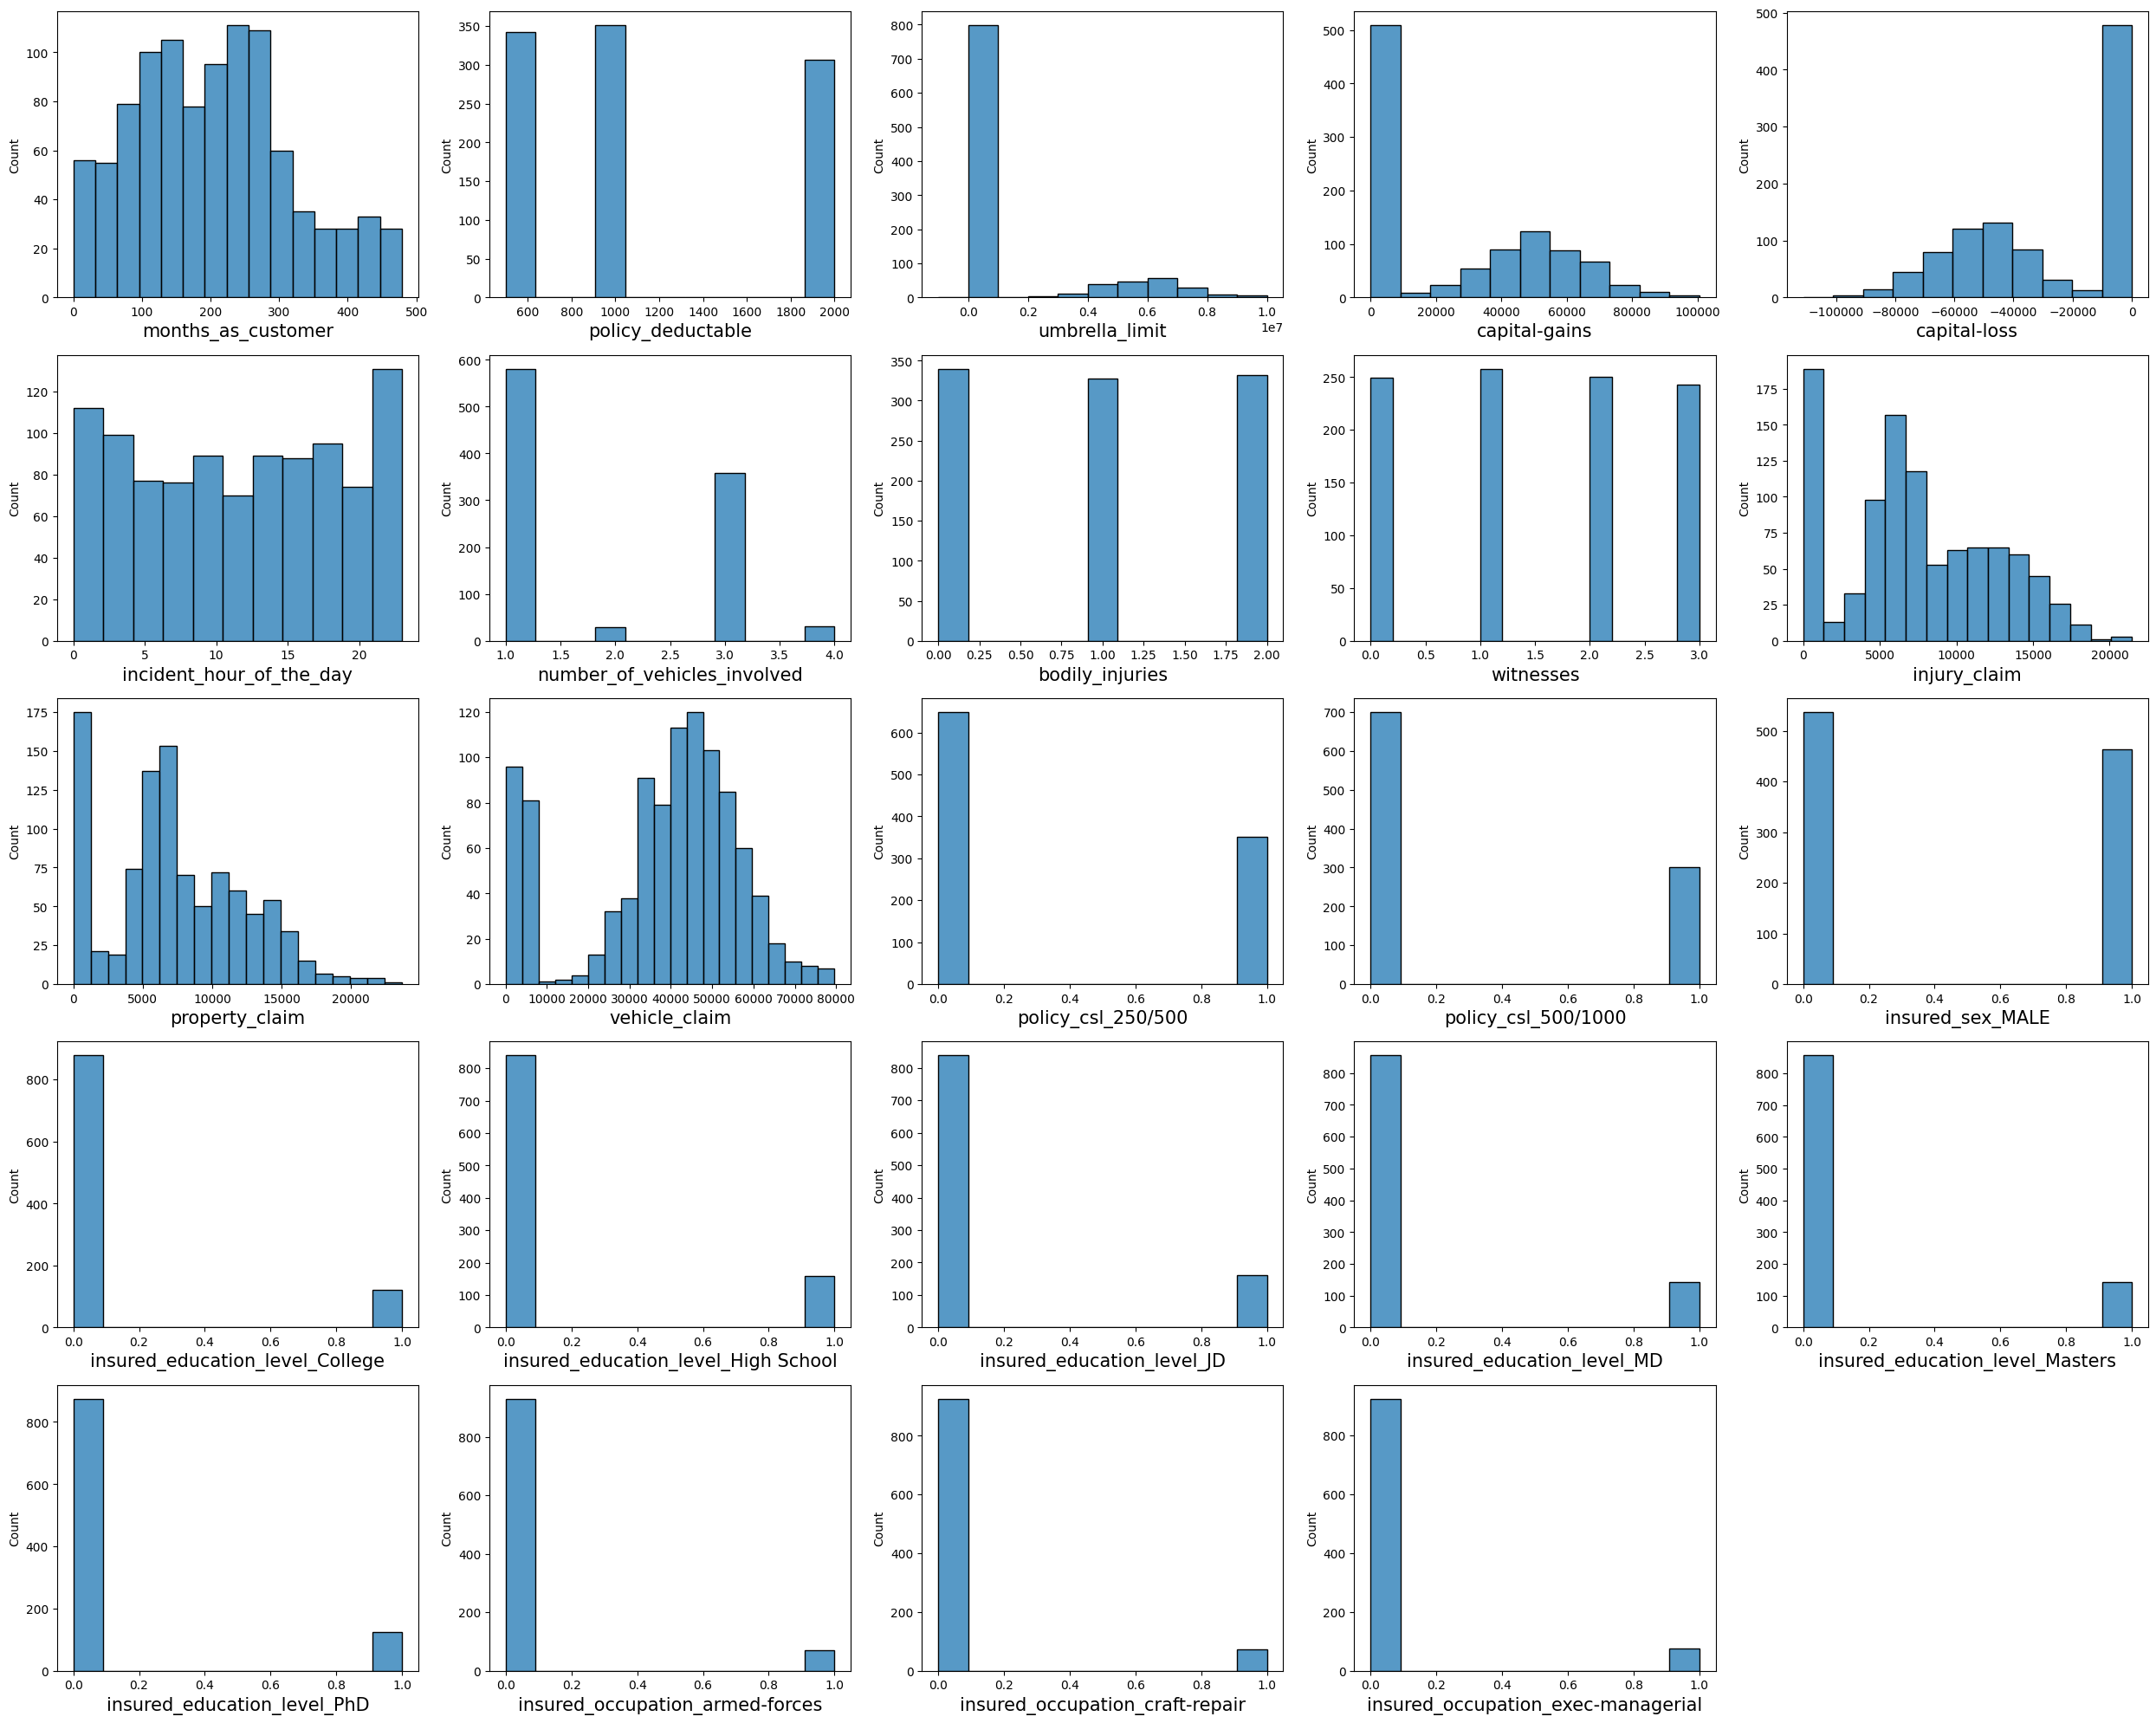

In [83]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.histplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
le = LabelEncoder()

In [93]:
y = le.fit_transform(y)
y

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [94]:
df.shape

(1000, 26)

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Scaling of Data (int)

In [96]:
X.dtypes.value_counts()

uint8    41
int64    12
dtype: int64

In [97]:
X.select_dtypes(include='int64').head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [98]:
a = X.select_dtypes(include='int64').columns

In [99]:
num_df = X_train[a]

In [100]:
num_df

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
821,187,500,0,59500,0,7,3,0,0,8200,4100,32800
10,235,500,4000000,38400,0,22,1,2,2,7910,15820,63280
757,173,1000,0,51000,0,22,1,2,3,9460,9460,33110
113,168,1000,0,0,-40600,13,2,1,1,14430,9620,33670
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
...,...,...,...,...,...,...,...,...,...,...,...,...
732,96,2000,0,10000,0,9,1,2,3,7120,14240,56960
975,240,500,9000000,0,-70900,18,2,0,2,6050,12100,48400
924,135,2000,0,37100,-46500,18,3,0,1,5940,2970,23760
12,60,500,3000000,0,0,9,1,1,0,4710,9420,42390


In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(num_df)

In [102]:
scaled_data 

array([[-0.15443606, -1.01678843, -0.47891352, ...,  0.13608483,
        -0.69129096, -0.28651969],
       [ 0.25935511, -1.01678843,  1.27749304, ...,  0.07712025,
         1.7123861 ,  1.31932921],
       [-0.27512515, -0.20205411, -0.47891352, ...,  0.39227577,
         0.40800162, -0.27018724],
       ...,
       [-0.60270982,  1.42741452, -0.47891352, ..., -0.32343225,
        -0.92304481, -0.76279509],
       [-1.24925852, -1.01678843,  0.8383914 , ..., -0.5735234 ,
         0.39979794,  0.21873264],
       [ 0.61280173, -1.01678843, -0.47891352, ..., -1.39699426,
        -1.39680709, -1.77119234]])

## indexing of scaled data 

In [103]:
volc = pd.DataFrame(data = scaled_data, columns = num_df.columns)
volc

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,-0.154436,-1.016788,-0.478914,1.226489,0.969467,-0.658185,1.139814,-1.200075,-1.339501,0.136085,-0.691291,-0.286520
1,0.259355,-1.016788,1.277493,0.465631,0.969467,1.483724,-0.825383,1.206492,0.451276,0.077120,1.712386,1.319329
2,-0.275125,-0.202054,-0.478914,0.919982,0.969467,1.483724,-0.825383,1.206492,1.346664,0.392276,0.408002,-0.270187
3,-0.318228,-0.202054,-0.478914,-0.919059,-0.481132,0.198579,0.157216,0.003209,-0.444113,1.402807,0.440816,-0.240683
4,-0.611330,1.427415,1.716595,0.346634,0.969467,-0.658185,1.139814,1.206492,1.346664,0.034422,-0.742564,-0.797567
...,...,...,...,...,...,...,...,...,...,...,...,...
745,-0.938915,1.427415,-0.478914,-0.558463,0.969467,-0.372597,-0.825383,1.206492,1.346664,-0.083507,1.388341,0.986358
746,0.302458,-1.016788,3.473001,-0.919059,-1.563722,0.912549,0.157216,-1.200075,0.451276,-0.301066,0.949444,0.535371
747,-0.602710,1.427415,-0.478914,0.418753,-0.691934,0.912549,1.139814,-1.200075,-0.444113,-0.323432,-0.923045,-0.762795
748,-1.249259,-1.016788,0.838391,-0.919059,0.969467,-0.372597,-0.825383,0.003209,-1.339501,-0.573523,0.399798,0.218733


### >> visualization of data before and after scaling

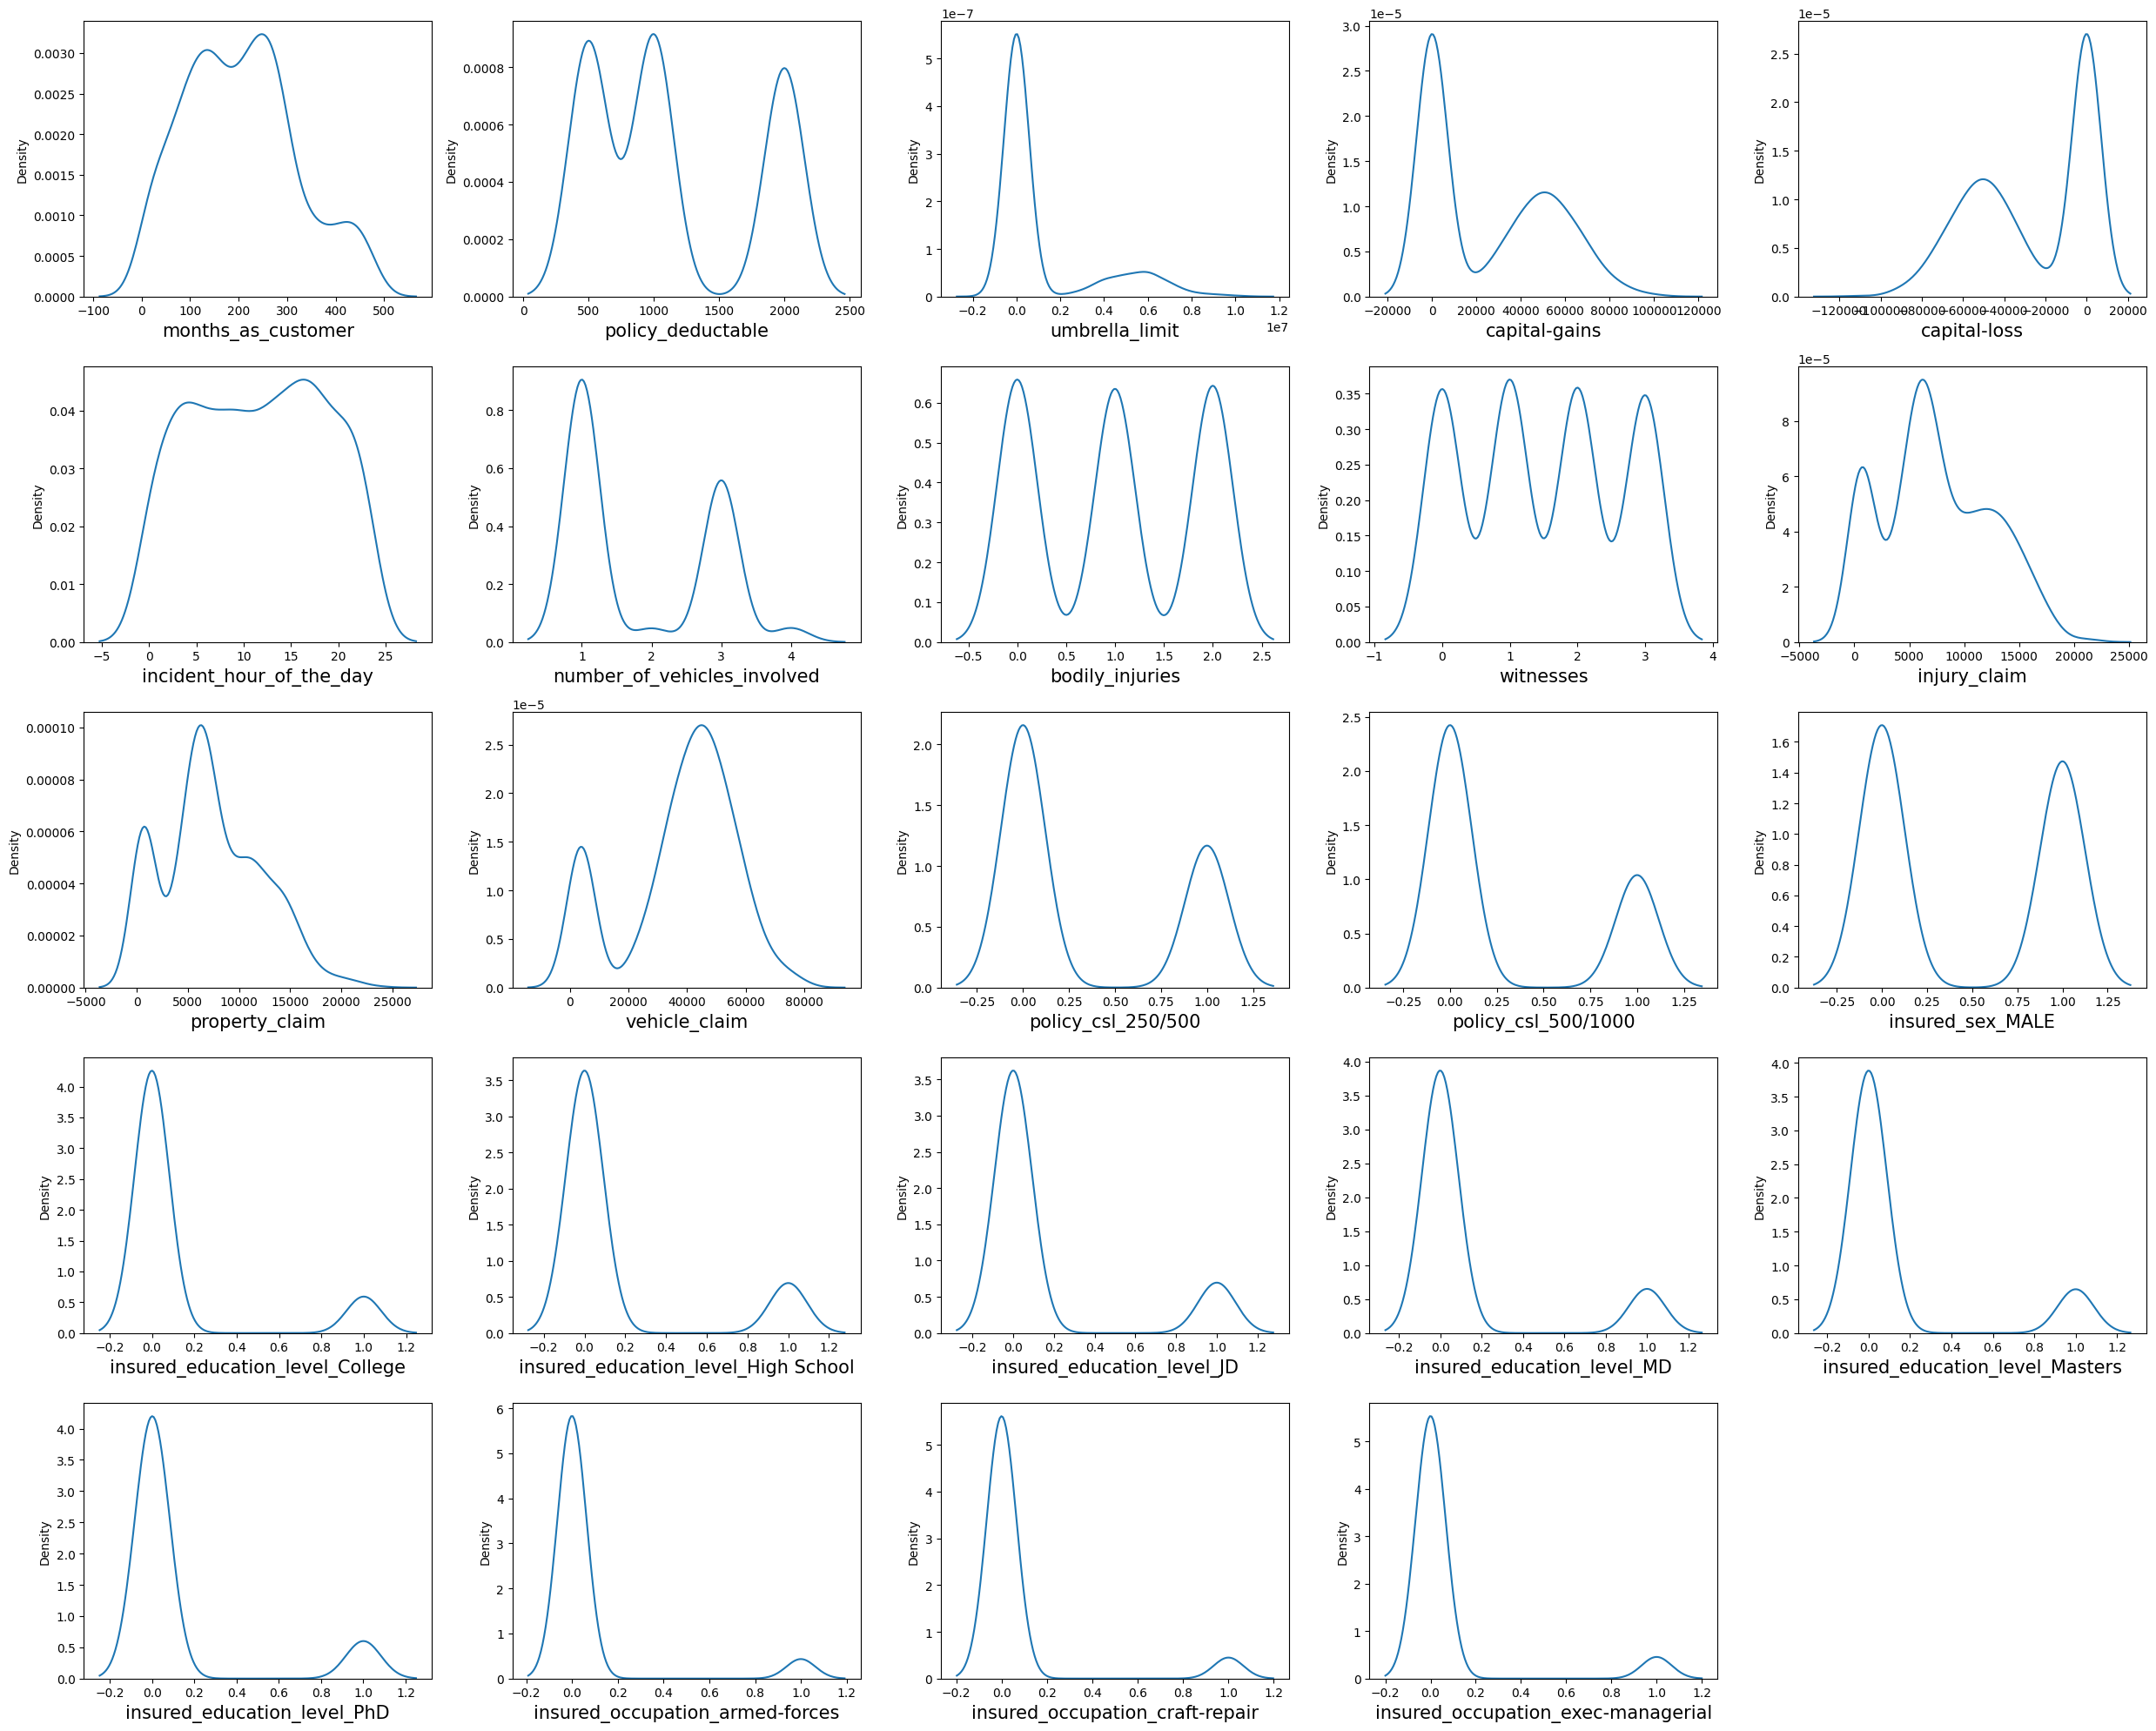

In [104]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.kdeplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

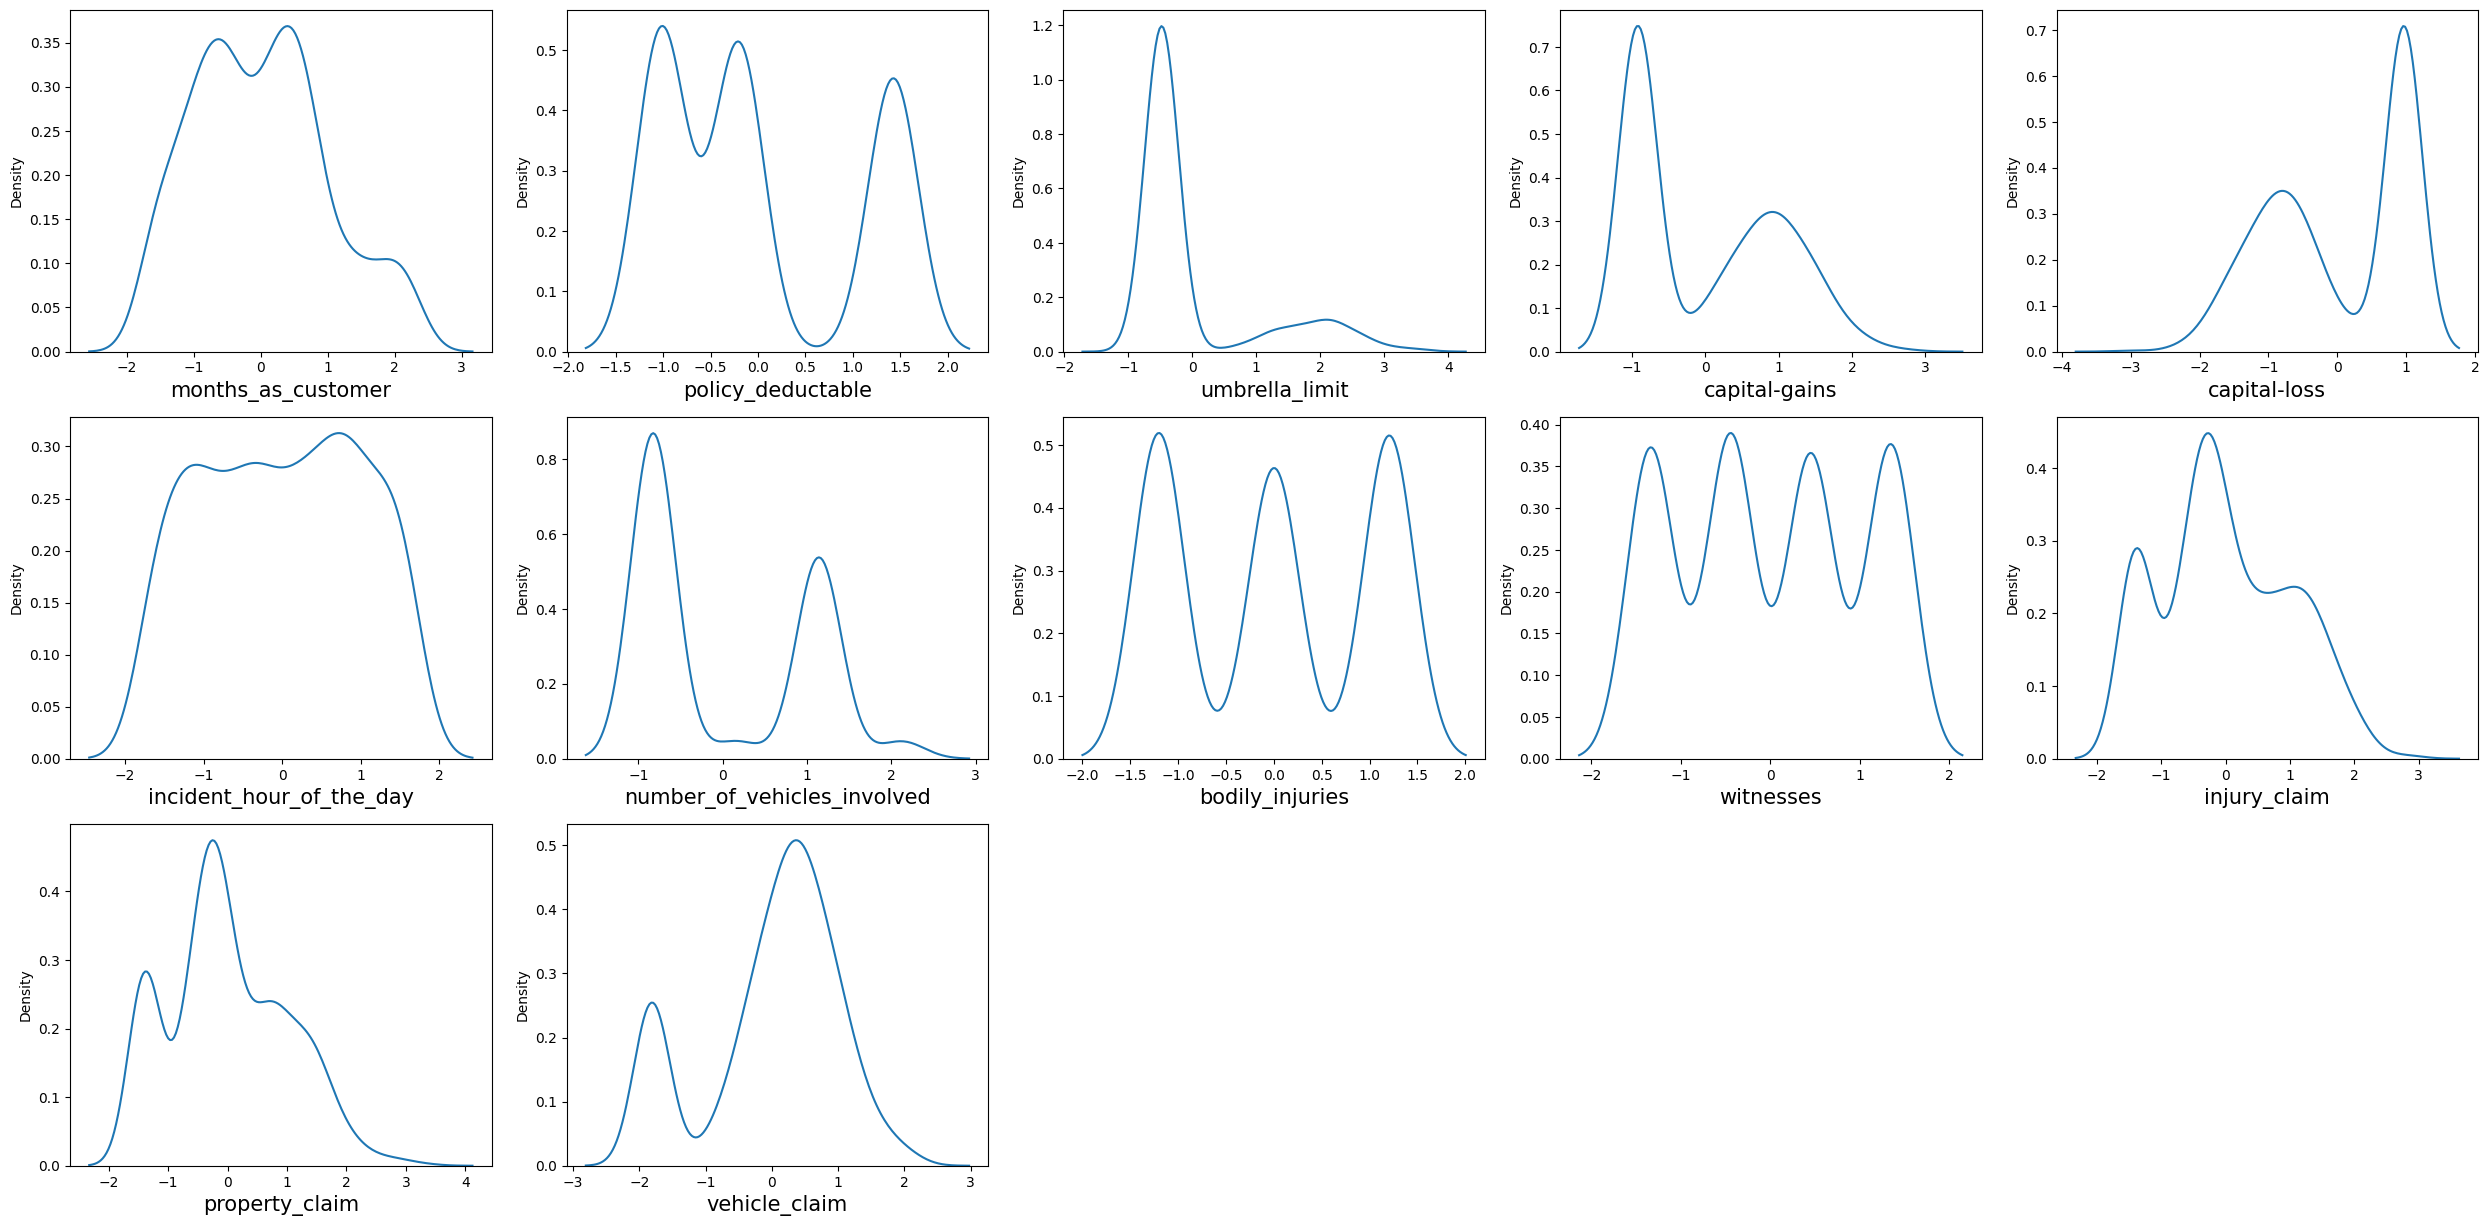

In [105]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in volc.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.kdeplot(volc[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

##  Here is no effect scalling of data.

In [106]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
821,-0.154436,-1.016788,-0.478914,1.226489,0.969467,-0.658185,1.139814,-1.200075,-1.339501,0.136085,-0.691291,-0.286520
10,0.259355,-1.016788,1.277493,0.465631,0.969467,1.483724,-0.825383,1.206492,0.451276,0.077120,1.712386,1.319329
757,-0.275125,-0.202054,-0.478914,0.919982,0.969467,1.483724,-0.825383,1.206492,1.346664,0.392276,0.408002,-0.270187
113,-0.318228,-0.202054,-0.478914,-0.919059,-0.481132,0.198579,0.157216,0.003209,-0.444113,1.402807,0.440816,-0.240683
2,-0.611330,1.427415,1.716595,0.346634,0.969467,-0.658185,1.139814,1.206492,1.346664,0.034422,-0.742564,-0.797567


In [107]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
821,187,500,0,59500,0,7,3,0,0,8200,4100,32800
10,235,500,4000000,38400,0,22,1,2,2,7910,15820,63280
757,173,1000,0,51000,0,22,1,2,3,9460,9460,33110
113,168,1000,0,0,-40600,13,2,1,1,14430,9620,33670
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100


In [108]:
# Now concat with X_train

In [109]:
X_train.drop(columns=scaled_num_df.columns, inplace= True)


In [110]:
X_train.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
821,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
10,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
757,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
113,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [111]:
X_train = pd.concat([scaled_num_df,X_train],axis= 1)

In [112]:
X_train.shape

(750, 53)

In [113]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
821,-0.154436,-1.016788,-0.478914,1.226489,0.969467,-0.658185,1.139814,-1.200075,-1.339501,0.136085,...,1,1,0,0,1,0,0,0,0,0
10,0.259355,-1.016788,1.277493,0.465631,0.969467,1.483724,-0.825383,1.206492,0.451276,0.077120,...,0,0,1,0,0,0,0,1,1,0
757,-0.275125,-0.202054,-0.478914,0.919982,0.969467,1.483724,-0.825383,1.206492,1.346664,0.392276,...,0,0,1,0,1,0,0,0,1,0
113,-0.318228,-0.202054,-0.478914,-0.919059,-0.481132,0.198579,0.157216,0.003209,-0.444113,1.402807,...,1,0,0,0,0,0,1,0,0,0
2,-0.611330,1.427415,1.716595,0.346634,0.969467,-0.658185,1.139814,1.206492,1.346664,0.034422,...,0,1,0,0,0,0,0,1,0,0


In [114]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

## Now We have completed the scaling of Train Data

##  >>>Model Selection

## Decision Tree Classifier

In [115]:
from sklearn.tree import DecisionTreeClassifier



In [116]:
dtc = DecisionTreeClassifier()

In [117]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [118]:
y_pred = dtc.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,  classification_report

In [122]:
confusion_matrix(y_test,y_pred)

array([[ 38, 146],
       [ 37,  29]], dtype=int64)

In [123]:
accuracy_score(y_test,y_pred)

0.268

## Accuracy score is 64.4%

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.21      0.29       184
           1       0.17      0.44      0.24        66

    accuracy                           0.27       250
   macro avg       0.34      0.32      0.27       250
weighted avg       0.42      0.27      0.28       250



### By using the GridsearchCV

In [125]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}


grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [126]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.8106666666666665


In [127]:

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [128]:
f1_score(y_test,y_pred)

0.5962732919254659

In [129]:
accuracy_score(y_test,y_pred)

0.74

## Now accuracy score is 74%

### By using Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
lr = LogisticRegression()

In [132]:
lr.fit(X_train,y_train)

LogisticRegression()

In [133]:
y_pred =lr.predict(X_test)

In [134]:
X_train.columns.shape

(53,)

In [135]:
accuracy_score(y_test,y_pred)

0.272

## By using the pipeline

In [136]:
X_pipe = df.drop(columns=['fraud_reported','final_verification'], axis = 1)
y_pipe = df['final_verification']

In [137]:
X_pipe.shape

(1000, 24)

In [138]:
X_pipe.head(3)

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,Police,5,1,YES,1,2,YES,6510,13020,52080
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,Police,8,1,NO,0,0,NO,780,780,3510
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,Police,7,3,NO,2,3,NO,7700,3850,23100


In [139]:
X_pipe.select_dtypes(include=['object']).columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available'],
      dtype='object')

In [140]:
for i in range(25):
    print(i,df.columns[i],'\n')

0 months_as_customer 

1 policy_csl 

2 policy_deductable 

3 policy_annual_premium 

4 umbrella_limit 

5 insured_sex 

6 insured_education_level 

7 insured_occupation 

8 insured_relationship 

9 capital-gains 

10 capital-loss 

11 incident_type 

12 collision_type 

13 incident_severity 

14 authorities_contacted 

15 incident_hour_of_the_day 

16 number_of_vehicles_involved 

17 property_damage 

18 bodily_injuries 

19 witnesses 

20 police_report_available 

21 injury_claim 

22 property_claim 

23 vehicle_claim 

24 fraud_reported 



In [153]:
a=[1,5,6,7, 8,11,12, 13 , 14, 17,20]

# these are the columns where labelEndcoding will apply.

In [142]:
len(a)

11

In [143]:
X_pipe.select_dtypes(include=['object']).shape[1]

11

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [145]:
from sklearn.metrics import r2_score , mean_absolute_error

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pipe,y_pipe,test_size=0.15,random_state=2)

In [147]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,5,6,7,8,11,12,13,14,17,20])
],remainder='passthrough')

step2 = DecisionTreeClassifier()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score -0.3691683569979718
MAE 0.24


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [148]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [150]:
accuracy_score(y_test,y_pred)

0.76

## Accuracy score is 76%

In [151]:
confusion_matrix(y_test,y_pred)

array([[96, 20],
       [16, 18]], dtype=int64)

## Done !!